In [81]:
from sklearn import datasets
import random
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import itertools
import time

## Make Synthetic Dataset

In [115]:
num_of_multivariate_gaussians = 15
dimensions = 40
means = [[np.random.random() for _ in range(dimensions)] for _ in range(num_of_multivariate_gaussians)]
# can make it sparse 
# can make the means evenly distributed
# can plot the dataset in 2d to make sure it will be evenly distributed
# can plot the 1 dimensional dataset. 
covariances = [sklearn.datasets.make_spd_matrix(dimensions) for _ in range(num_of_multivariate_gaussians)]


In [116]:
def f(x, multivariate_gaussians): 
    # maximize log probability, minimize negative log probability
    return sum(mvg.pdf(x) for mvg in multivariate_gaussians)

multivariate_gaussians = [multivariate_normal(mean, covar) for mean, covar in zip(means, covariances)]
f([np.random.random() for _ in range(dimensions)], multivariate_gaussians)


1.139997187246679e-11

In [117]:
def one_hot_encode_sequence(iterable, alphabet=range(4)): 
    mp = {}
    for i, x in enumerate(alphabet): 
        mp[x] = [0] * len(alphabet)
        mp[x][i] = 1
    result = []
    for x in iterable: 
        result.extend(mp[x])
    return result

start_time = time.time()
data_x, data_y = [], []
count = 10
for x in itertools.product(range(4), repeat=10): 
    seq = one_hot_encode_sequence(x)
    y = f(seq, multivariate_gaussians)
    if count % 100000 == 0: 
        print("{}/{} done in {:.2f} seconds".format(count, 1048586, time.time() - start_time))
    data_x.append(seq)
    data_y.append(y)
    count += 1
print(count)
print(len(data_x))
print(len(data_y))

100000/1048586 done in 70.57 seconds
200000/1048586 done in 133.48 seconds
300000/1048586 done in 194.68 seconds
400000/1048586 done in 255.37 seconds
500000/1048586 done in 323.33 seconds
600000/1048586 done in 383.47 seconds
700000/1048586 done in 443.45 seconds
800000/1048586 done in 968.16 seconds
900000/1048586 done in 1779.26 seconds
1000000/1048586 done in 2123.01 seconds
1048586
1048576
1048576


In [118]:
np.save('../data/synthetic_{}_mixed_mvg_{}_dim_data_x.npy'.format(num_of_multivariate_gaussians, dimensions), data_x)
np.save('../data/synthetic_{}_mixed_mvg_{}_dim_data_y.npy'.format(num_of_multivariate_gaussians, dimensions), data_y)
np.save('../data/synthetic_{}_mixed_mvg_{}_dim_means.npy'.format(num_of_multivariate_gaussians, dimensions), np.array(means))
np.save('../data/synthetic_{}_mixed_mvg_{}_dim_covariances.npy'.format(num_of_multivariate_gaussians,dimensions), np.array(covariances))

# Load Data

In [149]:
x_data = np.load('../data/synthetic_{}_mixed_mvg_{}_dim_data_x.npy'.format(num_of_multivariate_gaussians, dimensions))
np.testing.assert_array_equal(x_data, data_x)
y_data = np.load('../data/synthetic_{}_mixed_mvg_{}_dim_data_y.npy'.format(num_of_multivariate_gaussians, dimensions))
np.testing.assert_array_equal(y_data, data_y)
means_load = np.load('../data/synthetic_{}_mixed_mvg_{}_dim_means.npy'.format(num_of_multivariate_gaussians, dimensions))
np.testing.assert_array_equal(means_load, means)
covariances_load = np.load('../data/synthetic_{}_mixed_mvg_{}_dim_covariances.npy'.format(num_of_multivariate_gaussians,dimensions))
np.testing.assert_array_equal(covariances_load, covariances)

# Plot Data to make sure it's not weird

In [151]:
y_data = (y_data - y_data.mean()) / y_data.std()

In [154]:
reversed_lst = []
for j, (i, x) in enumerate(zip(y_data, x_data)):
    if i > 200:
        print(i, j, x)
        reversed_lst.append(j)
reversed_lst.reverse()
y_data_lst = y_data.tolist()
x_data_lst = x_data.tolist()
for x in reversed_lst: 
    y_data_lst.pop(x)
    x_data_lst.pop(x)
y_data = np.array(y_data_lst)
x_data = np.array(x_data_lst)

for j, (i, x) in enumerate(zip(y_data, x_data)):
    if i > 200:
        print(i, j, x)

285.6925141210237 82490 [1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0]
385.28441480063805 237618 [1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0]
223.79358254758515 238130 [1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0]
296.50430989322666 246330 [1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0]


In [143]:
y_data = np.array(data_y)
z = y_data.tolist()
z.pop(237618)
y_data = np.array(z)
y_data = (y_data - y_data.mean()) / y_data.std()

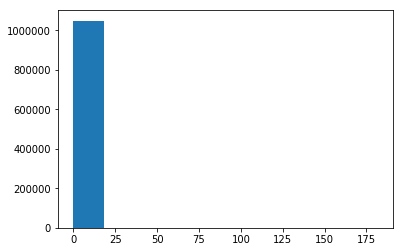

In [155]:
plt.hist(y_data)
plt.show()

In [ ]:
normalize data and visualize. 
plt.hist(data_y)

In [120]:
plt.tsne(data_x)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tsne'

In [ ]:
plt.tsne(data_x)